<a href="https://colab.research.google.com/github/VigRAN084/EpsilonGreedyAlgorithm/blob/main/EpsilonGreedyAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-1.14737356 -0.32730255  0.21667749 ...  4.2812486   4.28111271
  4.28107713]


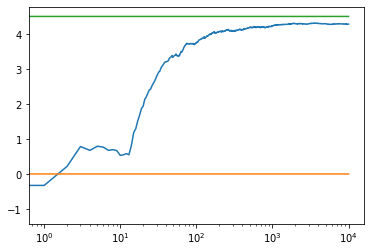

In [ ]:
'''
Vignesh Rangarajan
Epsilon-Greedy Algorithm
'''

import numpy as np
import matplotlib.pyplot as plt
  

class Decision:
  def __init__(self, sampleMean):
    #sample mean amongst past selections of the arm
    self.sampleMean = sampleMean
    #mean of the reward distribution 
    self.mean = 0
    #number of selections
    self.N = 0
    
  def getReward(self): 
    #generate reward from the normal distribution of the arm
    return  self.sampleMean +  np.random.randn() 
  
  def changeAvgReward(self, r):
    #increment the number of 
    self.N += 1
    self.mean =  1.0 / self.N * r + (self.mean - 1.0 / self.N * self.mean) 

def simulation(epsilon, N):
  #potential decisions and their rewards
  decisions = [Decision(0.0),
               Decision(0.5), 
               Decision(1.0),
               Decision(1.5),
               Decision(2.0),
               Decision(2.5),
               Decision(3.0),
               Decision(3.5),
               Decision(4.0),
               Decision(4.5)]
  
  data = np.empty(N)
 
  for i in range(N):
    #exploration when probability less than epsilon
    if np.random.random() < epsilon:
      index = np.random.choice(10)
    #exploitation when probability greater than epsilon
    #uses arm with the maximum mean value
    else:
      index = np.argmax([d.mean for d in decisions])
    #arm selection
    tempReward = decisions[index].getReward()
    decisions[index].changeAvgReward(tempReward)
  
    data[i] = tempReward
  #generates avg reward after each successive selection
  actionValEstimate = np.cumsum(data) / (np.arange(N) + 1)
  print(actionValEstimate)
  #plotting data
  plt.plot(actionValEstimate)
  plt.plot(np.ones(N)*0)
  plt.plot(np.ones(N)*4.5)
  plt.xscale('log')
  plt.show()
  
if __name__ == '__main__':
  trial = simulation(0.1, 10000)